In [107]:
# Importação das bibliotecas
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from sklearn.preprocessing import LabelEncoder
#pip install pyclustering

In [59]:
#load iris dataset
iris = pd.read_csv('iris.csv')
display(iris)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [60]:
#define the variables that will be passed to the model
variables = iris.iloc[:,0:4].values
class_ = iris.iloc[:,4].values

In [61]:
# Configuration of k-medoids parameters, using only the first two columns of the database because of the visualization
# 3, 12 and 20 are random indexes of database records (booting)
cluster = kmedoids(variables[:,0:2], [3, 12, 20])


In [62]:
# Application of the algorithm for grouping, obtaining predictions (group of each record) and visualization of medoids
cluster.process()
predictions = cluster.get_clusters()
medoids = cluster.get_medoids() #obtained after kmedoids implementation

display(medoids)

[112, 82, 7]

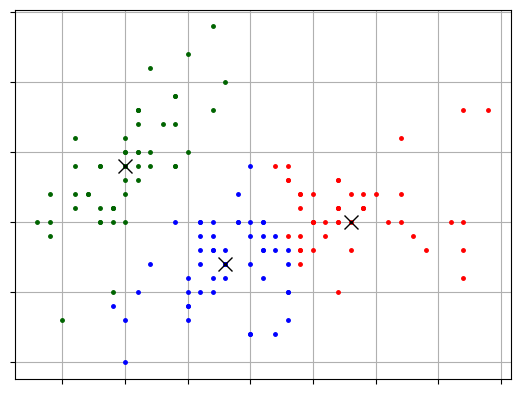

In [63]:
#grouping visualization
v = cluster_visualizer()
v.append_clusters(predictions, variables[:,0:2])
v.append_cluster(medoids, data = variables[:,0:2], marker = 'x', markersize = 10, color = 'black')

graph = v.show()

In [78]:
#encode the actual class names
labelencoder = LabelEncoder()
class_ = labelencoder.fit_transform(class_)
display(class_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
#Organize the predictions
setosa_pred = predictions[2]
versicolor_pred = predictions[0]
virginica_pred = predictions[1]

pred1 = np.zeros(len(setosa_pred))
pred2 = np.zeros(len(versicolor_pred))
pred3 = np.zeros(len(virginica_pred))

for i in range(len(setosa_pred)):
    pred1[i] = class_[setosa_pred[i]]
for i in range(len(versicolor_pred)):
    pred2[i] = class_[versicolor_pred[i]]
for i in range(len(virginica_pred)):
    pred3[i] = class_[virginica_pred[i]]

#create predictions array
pred = np.concatenate((pred1, pred2, pred3))

In [111]:
#Generate a confusion matrix from the predictions and actual values
results = confusion_matrix(class_, pred)
ACC = accuracy_score(class_, pred)

print(results)
print(f"Accuracy: {ACC*100:.2f} %")

[[50  0  0]
 [ 0 14 36]
 [ 0 36 14]]
Accuracy: 52.00 %
